In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [5]:
kaggle_path = '../input/breakhis/'
img_path = 'BreaKHis_v1/'

In [6]:
def plot_count_data(col_name):
    df = pd.DataFrame(data, columns=[col_name])

    # Count the occurrences of each label
    label_counts = df[col_name].value_counts()

    # Plot the counts
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=['cyan', 'violet'])
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title('Counts of '+ col_name +' in the samples')
    plt.xticks([0, 1], label_counts.index)
    plt.show()

    print(label_counts)

def view_image():
    pass

def build_compact_network(image_size):
    print('building model...')
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(image_size, image_size, 3)),
        hub.KerasLayer(model_handle, trainable=True, name='base_model'),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid', name='classifier') 
    ],name=model_name)
    model.build((None, image_size, image_size, 3))
    model.summary()
    print('model loaded!!!')
    return model

def decode_test(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224, 224])/255
    return img

In [7]:


import sys
print(sys.version)



3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

from tensorflow.keras.layers import Input


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import albumentations as A
from functools import partial
from sklearn.model_selection import train_test_split
import seaborn as sns
import scikitplot as skplt

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
data = pd.read_csv('../input/breakhis/Folds.csv')
img_dir = '../input/breakhis/BreaKHis_v1/'
class_names = ['benign', 'malignant']

#load from CSV File
data = data.rename(columns={'filename':'path'})
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: class_names.index(x))
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])
data.head(3)
#path = data.filename.apply(lambda x: x.split('/')[3])

,fold,mag,grp,path,label,label_int,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-003.png


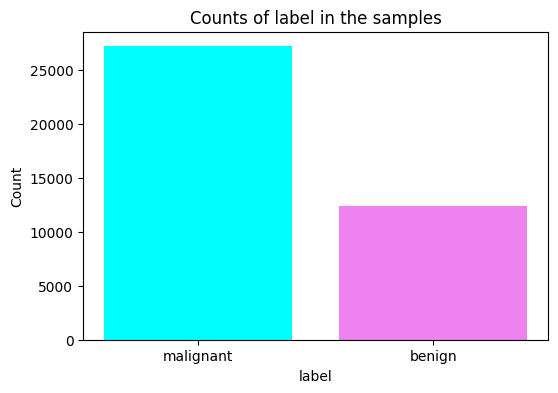

label
malignant    27145
benign       12400
Name: count, dtype: int64


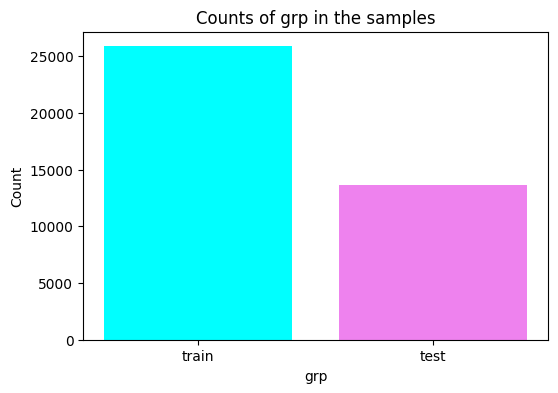

grp
train    25880
test     13665
Name: count, dtype: int64


In [14]:
plot_count_data('label')

plot_count_data('grp')

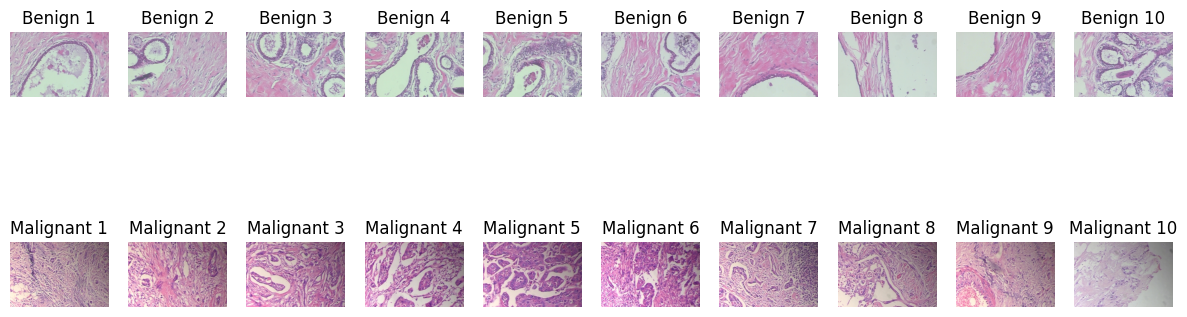

In [15]:
benign_paths = data[data['label'] == 'benign']['path'][:10]
malignant_paths = data[data['label'] == 'malignant']['path'][:10]


fig, axs = plt.subplots(2, 10, figsize=(15, 5))
for i, path in enumerate(benign_paths):
    img = plt.imread(kaggle_path + img_path + path)
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Benign {i+1}')

for i, path in enumerate(malignant_paths):
    img = plt.imread(kaggle_path + img_path + path)
    axs[1, i].imshow(img)
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Malignant {i+1}')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Training set
label
malignant    21556
benign        9600
Name: count, dtype: int64

Validation set
label
malignant    5289
benign       2500
Name: count, dtype: int64

Test set
label
benign       300
malignant    300
Name: count, dtype: int64


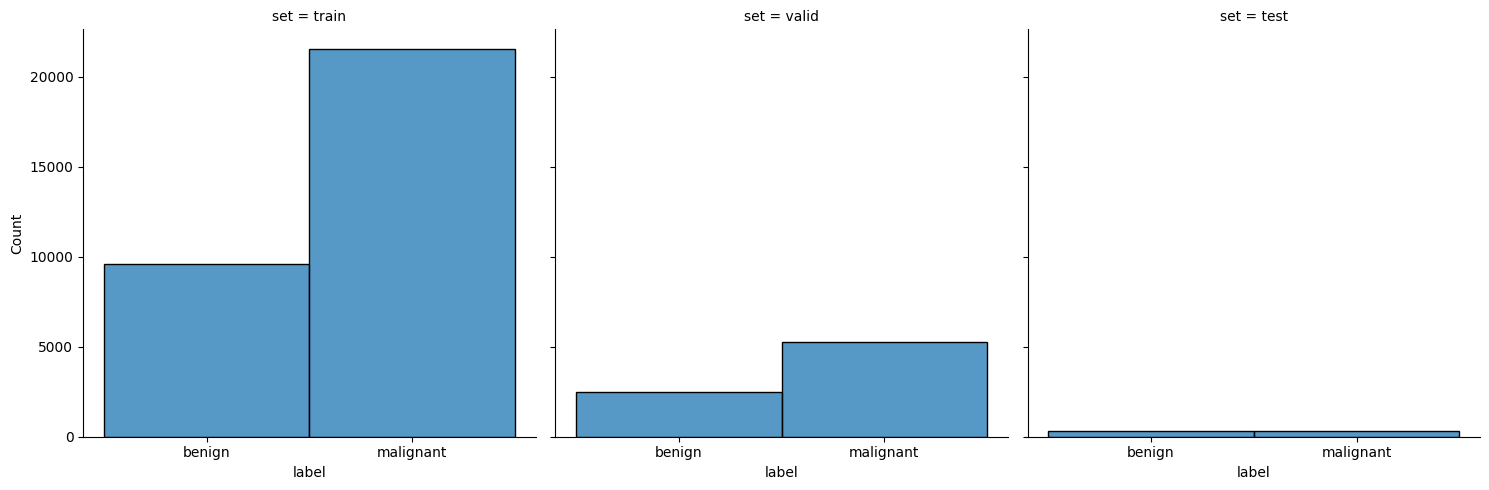

In [17]:
# remove 600 from dataset for testing
df_test = data.groupby('label').sample(n=300)
df_train = data.drop(df_test.index).reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# split training and validation set
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index).reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

df_test['set'] = 'test'
df_train['set'] = 'train'
df_val['set'] = 'valid'
data_new = pd.concat([df_train,df_val, df_test])

ax = sns.displot(data=data_new, x='label', col='set')

SAMPLE_SIZE = len(df_train)

print('Training set')
print(df_train.label.value_counts())

print('\nValidation set')
print(df_val.label.value_counts())

print('\nTest set')
print(df_test.label.value_counts())

In [18]:
def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def aug_fn(image): 
    transforms = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(p=0.5, limit=15),
        A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.1, 0.1), brightness_by_max=True),
        A.RandomResizedCrop(p=0.8, height=IMAGE_SIZE, width=IMAGE_SIZE, scale=(0.9, 1.1), ratio=(0.05, 1.1), interpolation=0),
        A.Blur(p=0.3, blur_limit=(1, 1)),
    ])
    data = {"image":image}
    aug_data = transforms(**data)
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img, tf.float32)
    aug_img = tf.image.resize(aug_img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return aug_img

def augmentor(image, label):
    aug_img = tf.numpy_function(func=aug_fn, inp=[image], Tout=tf.float32)
    return aug_img, label

In [23]:
import shutil
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np 
import pandas as pd 
import os 
from os import listdir
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns
from tqdm import tqdm

In [24]:
os.mkdir('augmented')
os.mkdir('/kaggle/working/augmented/benign')
os.mkdir('/kaggle/working/augmented/malignant')

In [25]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [26]:
files_benign=getListOfFiles('../input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign')
for f in files_benign:
    if f.endswith('.png'):
        
        shutil.copy(f,'augmented/benign')
files_malignant=getListOfFiles('')
for f in files_malignant:
    if f.endswith('.png'):
        
        shutil.copy(f,'augmented/malignant')

In [27]:
benign=getListOfFiles('/kaggle/working/augmented/benign')
malignent=getListOfFiles('/kaggle/working/augmented/malignant')

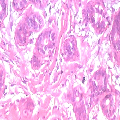

In [28]:
image.load_img(benign[0], target_size=(120,120,1), grayscale=False)

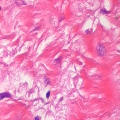

In [29]:
image.load_img(malignent[0], target_size=(120,120,1), grayscale=False)

In [30]:
len(benign)+len(malignent)

7909

In [31]:
data = pd.DataFrame(index=np.arange(0, len(benign)+len(malignent)), columns=["image", "target"])
k=0
for c in [0,1]:
        if c==1:
            for m in range(len(benign)):
                data.iloc[k]["image"] = benign[m]
                data.iloc[k]["target"] = 0
                k += 1
        else:
            for m in range(len(malignent)):
                data.iloc[k]["image"] = malignent[m]
                data.iloc[k]["target"] = 1
                k += 1

/tmp/ipykernel_34/1266289947.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.iloc[k]["image"] = malignent[m]
/tmp/ipykernel_34/1266289947.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are se

In [32]:
data.head()

,image,target
0,/kaggle/working/augmented/malignant/SOB_M_LC-1...,1
1,/kaggle/working/augmented/malignant/SOB_M_DC-1...,1
2,/kaggle/working/augmented/malignant/SOB_M_MC-1...,1
3,/kaggle/working/augmented/malignant/SOB_M_DC-1...,1
4,/kaggle/working/augmented/malignant/SOB_M_DC-1...,1


In [33]:
data.shape

(7909, 2)

In [34]:
count=data["target"].value_counts() 
count

target
1    5429
0    2480
Name: count, dtype: int64

In [36]:
mal_downsampled = resample(data[data['target']==1],n_samples=data[data['target']==0].shape[0], random_state=42)
# combine minority and downsampled majority
downsampled = pd.concat([data[data['target']==0], mal_downsampled])
# check new class counts
downsampled['target'].value_counts()

target
0    2480
1    2480
Name: count, dtype: int64

In [37]:


downsampled.head()



,image,target
5429,/kaggle/working/augmented/benign/SOB_B_F-14-29...,0
5430,/kaggle/working/augmented/benign/SOB_B_TA-14-3...,0
5431,/kaggle/working/augmented/benign/SOB_B_A-14-22...,0
5432,/kaggle/working/augmented/benign/SOB_B_TA-14-1...,0
5433,/kaggle/working/augmented/benign/SOB_B_PT-14-2...,0


In [38]:
downsampled.shape

(4960, 2)

In [41]:
train_image = []
y = []

for i in tqdm(range(downsampled.shape[0])):
    img = image.load_img(downsampled['image'].iloc[i], target_size=(28,28,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

        
X = np.array(train_image)
y = downsampled.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2 , shuffle=True)

Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y_test, 2)
Y_val = to_categorical(y_val, 2)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

100%|██████████| 4960/4960 [01:11<00:00, 68.95it/s]

(3968, 28, 28, 3)
(793, 28, 28, 3)
(199, 28, 28, 3)


In [42]:
model = Sequential()
#convlouton layer with the number of filters, filter size, strides steps, padding or no, activation type and the input shape.
model.add(Conv2D(30, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,3)))
#pooling layer to reduce the volume of input image after convolution,
model.add(MaxPool2D(pool_size=(1,1)))
#flatten layer to flatten the output
model.add(Flatten())   # flatten output of conv
model.add(Dense(150, activation='relu'))  # hidden layer of 150 neuron
model.add(Dense(2, activation='softmax'))  # output layer
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs = 5, validation_data=(X_test, Y_test))

Epoch 1/5
397/397 [==============================] - 11s 25ms/step - loss: 0.5649 - accuracy: 0.7492 - val_loss: 0.5304 - val_accuracy: 0.7390
Epoch 2/5
397/397 [==============================] - 9s 24ms/step - loss: 0.4912 - accuracy: 0.7777 - val_loss: 0.4879 - val_accuracy: 0.7982
Epoch 3/5
397/397 [==============================] - 10s 25ms/step - loss: 0.4734 - accuracy: 0.7863 - val_loss: 0.4831 - val_accuracy: 0.7869
Epoch 4/5
397/397 [==============================] - 10s 24ms/step - loss: 0.4325 - accuracy: 0.8042 - val_loss: 0.4883 - val_accuracy: 0.7705
Epoch 5/5
397/397 [==============================] - 10s 25ms/step - loss: 0.4050 - accuracy: 0.8259 - val_loss: 0.5140 - val_accuracy: 0.7692


<Axes: >

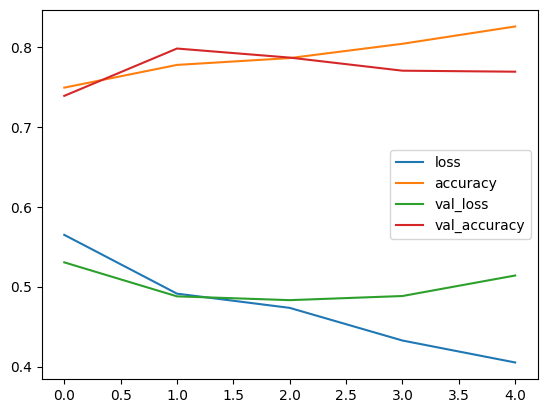

In [43]:


history_df = pd.DataFrame(history.history)
history_df.plot()



In [46]:
y_pred = np.argmax(model.predict(X_val), axis=-1)
acc_test = (y_pred == y_val).mean()
print("Accuracy test: ", acc_test * 100)

7/7 [==============================] - 0s 7ms/step
Accuracy test:  82.41206030150754


VGG16

In [5]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D,Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


2024-07-23 02:41:30.349659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 02:41:30.349755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 02:41:30.514284: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
data = pd.read_csv('../input/breakhis/Folds.csv')

# Define the image directory
img_dir = '../input/breakhis/BreaKHis_v1/'

# Prepare the data
data = data.rename(columns={'filename': 'path'})
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: 1 if x == 'malignant' else 0)
data['filename'] = data.path.apply(lambda x: os.path.join(img_dir, x))

# Split the data
X = data['filename']
y = data['label_int']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [7]:
# Ensure 'label_int' column values are strings
data['label_int'] = data['label_int'].astype(str)

In [8]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
# Freeze the bottom layers and unfreeze the top layers for fine-tuning
for layer in base_model.layers[:-4]:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [10]:
# Build the model
model = Sequential([
    Input(shape=(224, 224, 3)),
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 7,342,593 (28.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [11]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
print(data.head())

   fold  mag    grp                                               path  \
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
3     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
4     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

    label label_int                                           filename  
0  benign         0  ../input/breakhis/BreaKHis_v1/BreaKHis_v1/hist...  
1  benign         0  ../input/breakhis/BreaKHis_v1/BreaKHis_v1/hist...  
2  benign         0  ../input/breakhis/BreaKHis_v1/BreaKHis_v1/hist...  
3  benign         0  ../input/breakhis/BreaKHis_v1/BreaKHis_v1/hist...  
4  benign         0  ../input/breakhis/BreaKHis_v1/BreaKHis_v1/hist...  


In [13]:
# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=data.loc[data.index.isin(X_train.index)],
    x_col='filename',
    y_col='label_int',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=data.loc[data.index.isin(X_val.index)],
    x_col='filename',
    y_col='label_int',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=data.loc[data.index.isin(X_test.index)],
    x_col='filename',
    y_col='label_int',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 31636 validated image filenames belonging to 2 classes.
Found 3954 validated image filenames belonging to 2 classes.
Found 3955 validated image filenames belonging to 2 classes.


In [14]:
# Debugging: Check the number of samples
# Debugging: Check the number of samples in each generator
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Test samples: {test_generator.samples}")

Training samples: 31636
Validation samples: 3954
Test samples: 3955


In [15]:
# Ensure that the generators have data
if train_generator.samples == 0:
    raise ValueError("No training images found. Check the training directory.")
if val_generator.samples == 0:
    raise ValueError("No validation images found. Check the validation directory.")
if test_generator.samples == 0:
    raise ValueError("No test images found. Check the test directory.")

In [17]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.8237 - loss: 0.3812

W0000 00:00:1721703530.774942     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


988/988 ━━━━━━━━━━━━━━━━━━━━ 887s 890ms/step - accuracy: 0.8237 - loss: 0.3811 - val_accuracy: 0.9385 - val_loss: 0.1645
Epoch 2/10
  1/988 ━━━━━━━━━━━━━━━━━━━━ 2:25 148ms/step - accuracy: 0.9062 - loss: 0.2020

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


988/988 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9062 - loss: 0.2020 - val_accuracy: 0.8889 - val_loss: 0.2301
Epoch 3/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 824s 829ms/step - accuracy: 0.9293 - loss: 0.1770 - val_accuracy: 0.9726 - val_loss: 0.0805
Epoch 4/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.9688 - loss: 0.0752 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 5/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 826s 830ms/step - accuracy: 0.9559 - loss: 0.1119 - val_accuracy: 0.9736 - val_loss: 0.0750
Epoch 6/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 107us/step - accuracy: 0.9688 - loss: 0.0618 - val_accuracy: 0.9444 - val_loss: 0.0739
Epoch 7/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 824s 829ms/step - accuracy: 0.9686 - loss: 0.0803 - val_accuracy: 0.9855 - val_loss: 0.0375
Epoch 8/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0316
Epoch 9/10
988/988 ━━━━━━━━━━━━━━━━━━━━ 821s 825ms/step - accuracy: 0.9781 - loss: 0.0560 - val

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

124/124 ━━━━━━━━━━━━━━━━━━━━ 71s 576ms/step - accuracy: 0.9911 - loss: 0.0272
Test Loss: 0.0330
Test Accuracy: 0.9894


VGG with SVM